# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = query_url + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | banikoara
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | kaeo
Processing Record 19 of Set 1 | san alberto
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,8.62,91,100,7.72,US,1680378076
1,kavaratti,10.5669,72.6420,27.42,68,5,3.20,IN,1680378391
2,esperance,-33.8667,121.9000,17.95,84,100,5.76,AU,1680377924
3,punta arenas,-53.1500,-70.9167,12.06,54,20,11.32,CL,1680377875
4,ushuaia,-54.8000,-68.3000,8.81,61,0,3.09,AR,1680378077


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,8.62,91,100,7.72,US,1680378076
1,kavaratti,10.5669,72.6420,27.42,68,5,3.20,IN,1680378391
2,esperance,-33.8667,121.9000,17.95,84,100,5.76,AU,1680377924
3,punta arenas,-53.1500,-70.9167,12.06,54,20,11.32,CL,1680377875
4,ushuaia,-54.8000,-68.3000,8.81,61,0,3.09,AR,1680378077


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

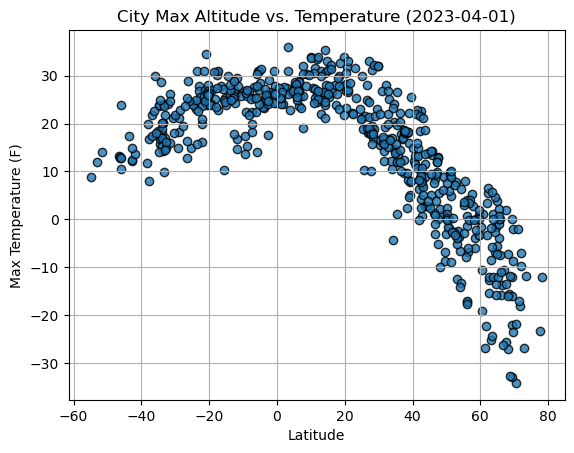

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Altitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

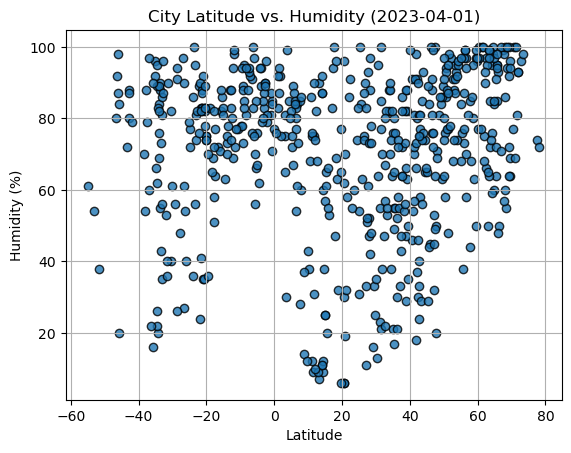

In [22]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

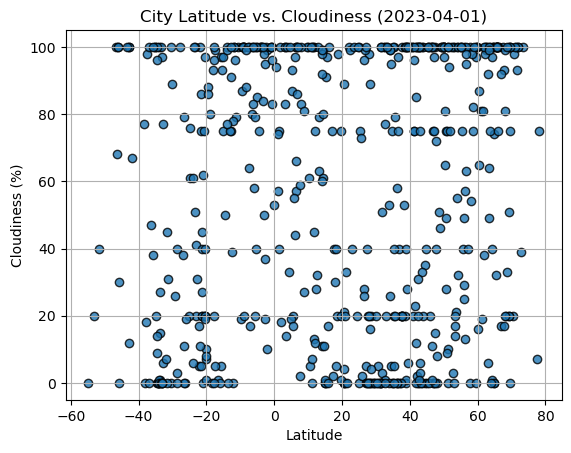

In [23]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

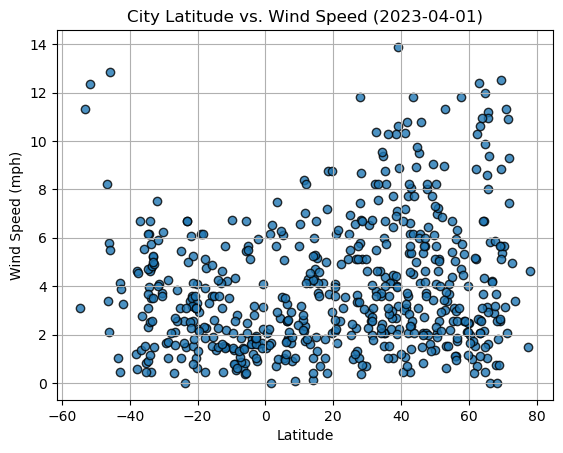

In [25]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,8.62,91,100,7.72,US,1680378076
1,kavaratti,10.5669,72.6420,27.42,68,5,3.20,IN,1680378391
11,banikoara,11.2985,2.4386,31.71,9,100,2.16,BJ,1680378392
13,hilo,19.7297,-155.0900,27.93,77,75,2.06,US,1680378033
14,tuktoyaktuk,69.4541,-133.0374,-22.00,64,0,5.66,CA,1680378136


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,esperance,-33.8667,121.9000,17.95,84,100,5.76,AU,1680377924
3,punta arenas,-53.1500,-70.9167,12.06,54,20,11.32,CL,1680377875
4,ushuaia,-54.8000,-68.3000,8.81,61,0,3.09,AR,1680378077
5,new norfolk,-42.7826,147.0587,12.18,88,100,0.45,AU,1680378080
6,mar del plata,-38.0023,-57.5575,20.01,54,0,4.63,AR,1680378087


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8822397459316477


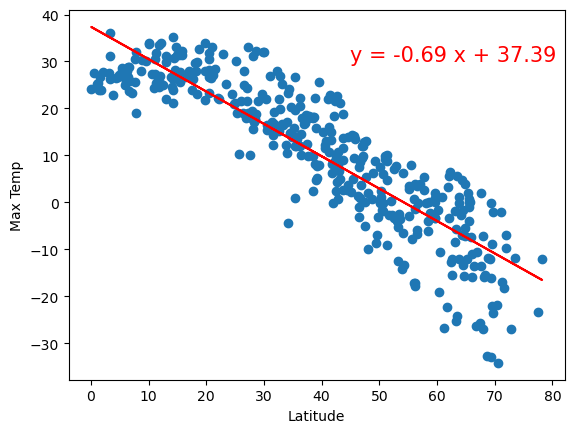

In [99]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp", (45,30))

The r-squared is: 0.5794182844261274


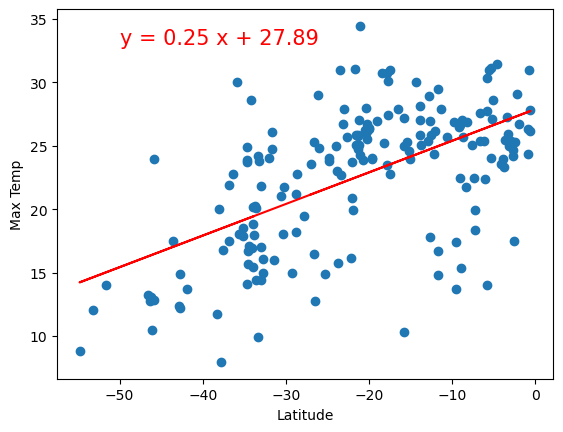

In [101]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,33))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
For northern Hemisphere, The equation implies that as the latitude increases , the temperature decreases.On the other hand,there is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere.For southern Hemisphere, as the latitude increases, the maximum temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.33148268086792965


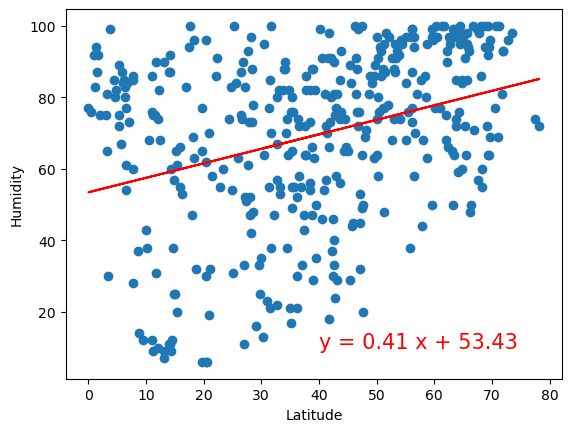

In [77]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.29377595172062937


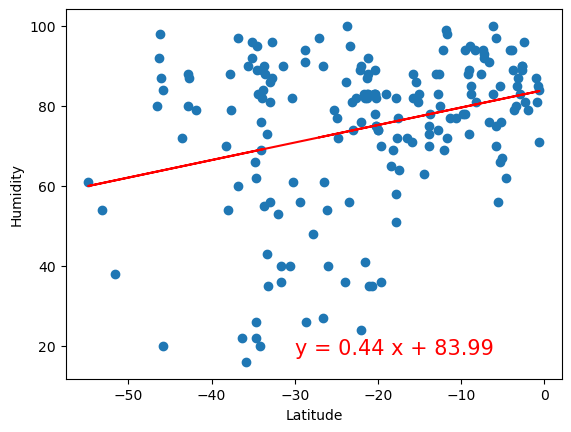

In [102]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,18))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
For Nothern Hemisphere,the equation indicates that as latitude increases, humidity also increases. This is because the slope of the equation is positive (0.41), indicating a direct relationship between latitude and humidity. As latitude increases by one unit, the humidity is expected to increase by 0.41 units. Therefore, we can say that the relationship between latitude and humidity is a positive one, and as latitude increases, humidity tends to increase as well.
For southern Hemisphere,the equation also indicates that as latitude increases, humidity also increases.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13651765744266223


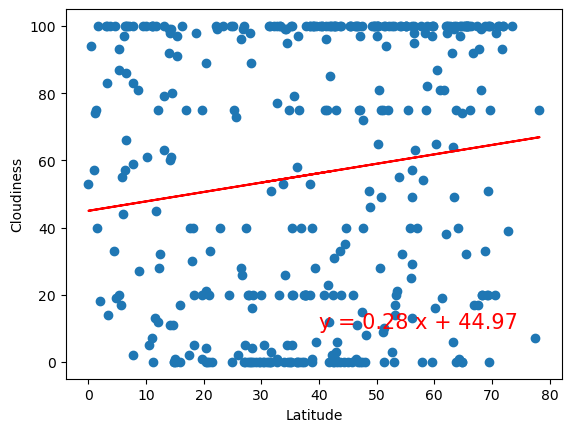

In [88]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.33276586351396753


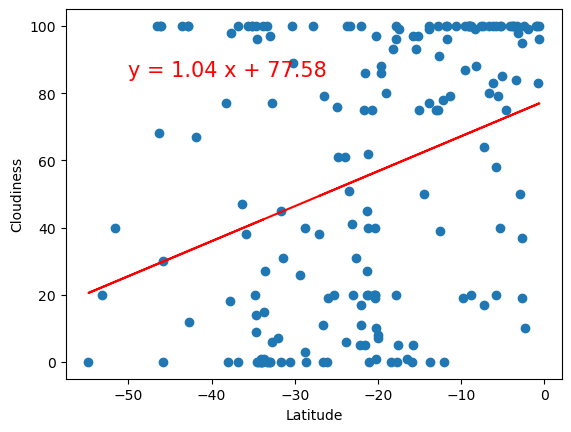

In [103]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,85))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
For Nothern Hemisphere,the equation y=0.28x+44.97 suggests that as latitude increases in the Northern Hemisphere, cloudiness is expected to increase. This means that there is a positive relationship between latitude and cloudiness, and the slope of the line (0.28) indicates the rate at which cloudiness is expected to increase per degree of latitude.
Similarly, for southern hemisphere,the equation y=1.04x+775.58 suggests that as latitude increases in the Southern Hemisphere, cloudiness is expected to increase. This means that there is a positive relationship between latitude and cloudiness, and the slope of the line (1.04) indicates the rate at which cloudiness is expected to increase per degree of latitude in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.15957594997001479


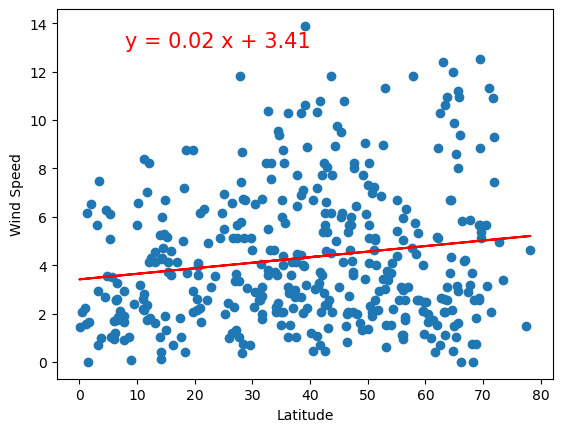

In [106]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (8,13))

The r-squared is: -0.35812640780914057


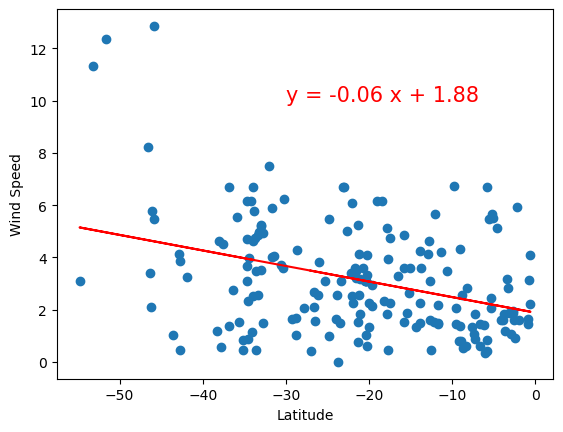

In [97]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northern Hemisphere, the equation y=0.02x+3.41 suggests the relationship is positive. 
This means as latitude increases in the Northern Hemisphere, wind speed is expected to increase as well, but at a relatively small rate (0.02 units per degree of latitude).
On the other hand,  there is a very low negative correlation between wind speed and latitude on the Southern Hemisphere. As the latitude decreases away from the equator, the wind speed lightly increases.